In [12]:
import torch
import torch.nn as nn
from model import load_model, Resnet_ae

model_paths = ["../models/AE_resnet18_RUBCNL_lr_0.0001/",
               "../models/AE_resnet18_RUBCNL_lr_0.001/",
               "../models/AE_resnet18_RUBCNL_lr_0.01/",
               "../models/AE_resnet18_RUBCNL_lr_0.0005/",]
models = []
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
for path in model_paths:
    model = Resnet_ae()
    model.load_state_dict(torch.load(path + "best_model.pt", map_location=device, weights_only=True))
    models.append((model, path))
    

In [13]:
from data_loader import get_dataset_ae_single
dataset = get_dataset_ae_single("../Test_Data_copy/", "tiff", squelch=False)


p026
p008


Model: ../models/AE_resnet18_RUBCNL_lr_0.0001/
mse: 0.0041


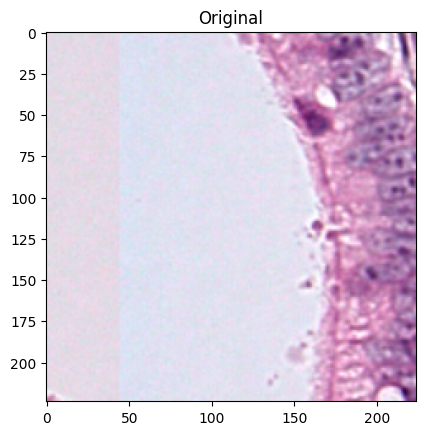

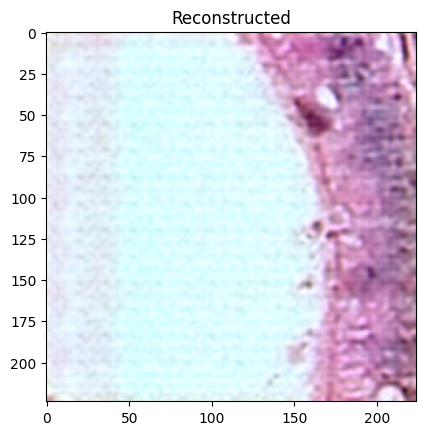

---------------------------------------------------
Model: ../models/AE_resnet18_RUBCNL_lr_0.001/
mse: 0.005


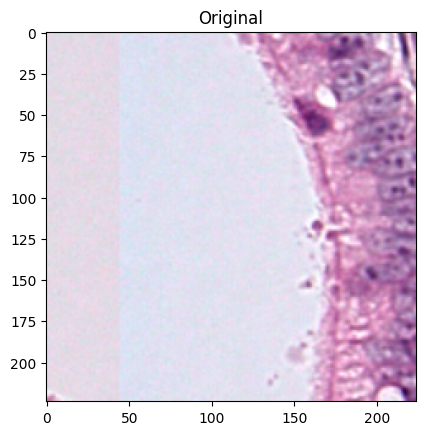

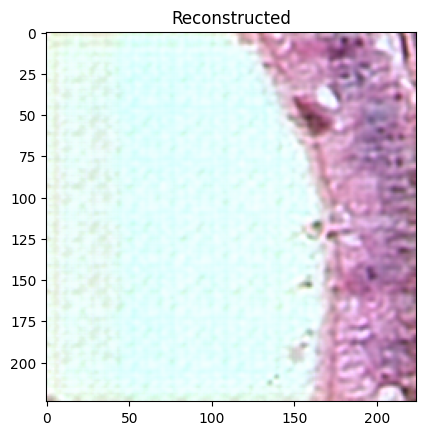

---------------------------------------------------
Model: ../models/AE_resnet18_RUBCNL_lr_0.01/
mse: 0.0029


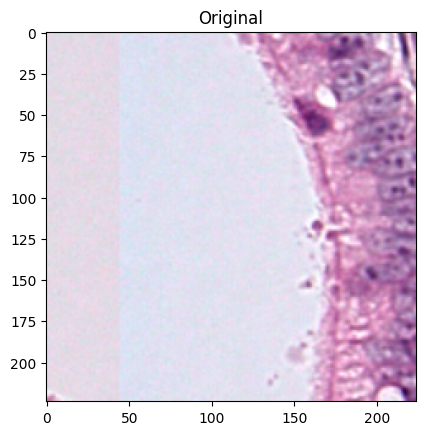

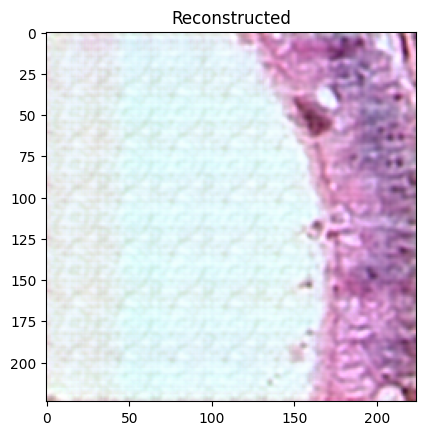

---------------------------------------------------
Model: ../models/AE_resnet18_RUBCNL_lr_0.0005/
mse: 0.0041


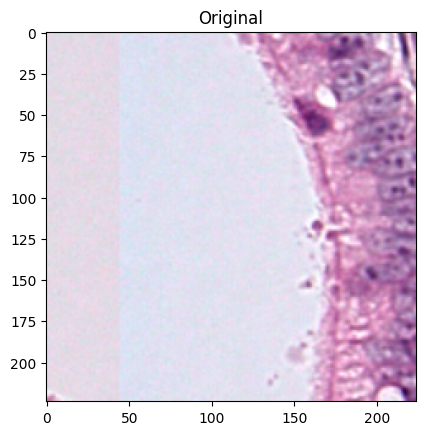

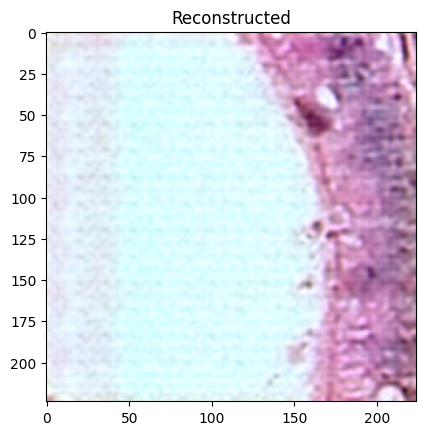

---------------------------------------------------


In [20]:
import matplotlib.pyplot as plt
import torchmetrics
for m, path in models:
    print(f"Model: {path}")
    m.eval()
    m.to(device)
    i = 99
    img, _ = dataset[i]
    img = img.unsqueeze(0).to(device)
    out = m(img)
    print("mse:",round(torchmetrics.MeanSquaredError().to(device)(img, out).item(), 4))

    
    out = out.transpose(1, 2).transpose(2, 3)
    img = img.transpose(1, 2).transpose(2, 3)
    plt.imshow(img.squeeze().cpu().detach().numpy())
    plt.title("Original")
    plt.show()
    plt.title("Reconstructed")
    plt.imshow(out.squeeze().cpu().detach().numpy())
    plt.show()
    print("---------------------------------------------------")

In [ ]:
–